# MNIST Neural Network

### Imports

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
from NN_database import Database
import pandas as pd

### Load Data and Create Model

In [3]:
mnist = tf.keras.datasets.mnist
mnist = mnist.load_data()
(x_train,y_train),(x_test,y_test)=mnist
x_train,x_test = tf.keras.utils.normalize(x_train,axis=1),tf.keras.utils.normalize(x_test,axis=1)


#print(np.shape([1,2,3,4]))

#print(np.shape(x_train)) #(60000,28,28)

#feed forward NN

hidden_units = 200

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(hidden_units,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(60,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

optim = tf.keras.optimizers.Adam(learning_rate=0.01)

#could try sparse
model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

steps_per_epoch = len(x_train)//100

2022-07-15 16:39:24.692494: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
mnist = tf.keras.datasets.mnist
mnist = mnist.load_data()
(x_train,y_train),(x_test,y_test)=mnist
x_train,x_test = tf.keras.utils.normalize(x_train,axis=1),tf.keras.utils.normalize(x_test,axis=1)

#print(np.shape([1,2,3,4]))

#print(np.shape(x_train)) #(60000,28,28)

#feed forward NN

hidden_units = 200

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(hidden_units,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(60,activation=tf.nn.relu))
# #model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

optim = tf.keras.optimizers.Adam(learning_rate=0.01)

#could try sparse
model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

steps_per_epoch = len(x_train)//100

#### Decaying Learning Rate Function

In [11]:
# lr schedule callback
lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * math.pow(0.6,epoch), verbose=True)


### Train

In [12]:
#tf.keras.models.Sequential().fit()
model.fit(x_train,y_train,epochs=10,steps_per_epoch = steps_per_epoch)#callbacks=[lr_decay_callback])

Epoch 1/10


ValueError: in user code:

    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/alecgironda/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (100, 1) and (100, 10) are incompatible


In [5]:
# print model layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (100, 784)                0         
                                                                 
 dense (Dense)               (100, 200)                157000    
                                                                 
 dense_1 (Dense)             (100, 10)                 2010      
                                                                 
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


### Evaluate Loss and Accuracy on Test Set

In [6]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print("loss: ",val_loss,"\n","accuracy: ",val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.9803
loss:  0.07105107605457306 
 accuracy:  0.9803000092506409


In [7]:
model.save('num_model')

INFO:tensorflow:Assets written to: num_model/assets


In [8]:
new_model = tf.keras.models.load_model('num_model')

In [9]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [10]:
print(len(x_test))

10000


8


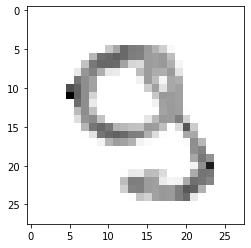

In [11]:
for i in range(len(predictions)):
    if np.argmax(predictions[i])!=y_test[i]:
        print(np.argmax(predictions[i]))
        plt.imshow(x_test[i],cmap=plt.cm.binary)
        break

In [12]:
print(np.argmax(predictions[9876]))

1


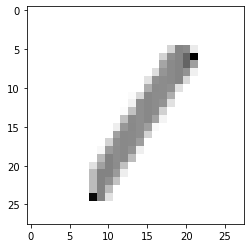

In [13]:
plt.imshow(x_test[9876],cmap=plt.cm.binary)

In [3]:
db = Database()

connection = db.create_db_connection("localhost", "root", "Stew2Crew!", "mnist_db")

select_all_query = "SELECT * FROM mnist"

results = db.read_query(connection,select_all_query)

from_db = []

for result in results:
  result = list(result)
  from_db.append(result)

columns = ["nn_id", "hidden_units", "layers", "training_size", "learning_rate",
            "decay_lr","dropout","dropout_size","epochs","batch_size","loss",
            "metrics","activation","accuracy"]

df = pd.DataFrame(from_db, columns=columns)

display(df)

MySQL Database connection successful


,nn_id,hidden_units,layers,training_size,learning_rate,decay_lr,dropout,dropout_size,epochs,batch_size,loss,metrics,activation,accuracy
0,1,50,1,60000,0.01,1,1,0.25,10,100,sparse_categorical_crossentropy,accuracy,relu,0.9634
1,2,100,1,60000,0.01,1,1,0.25,10,100,sparse_categorical_crossentropy,accuracy,relu,0.9756
2,3,150,1,60000,0.01,1,1,0.25,10,100,sparse_categorical_crossentropy,accuracy,relu,0.9765
3,4,200,1,60000,0.01,1,1,0.25,10,100,sparse_categorical_crossentropy,accuracy,relu,0.9803
4,5,250,1,60000,0.01,1,1,0.25,10,100,sparse_categorical_crossentropy,accuracy,relu,0.9807
5,6,300,1,60000,0.01,1,1,0.25,10,100,sparse_categorical_crossentropy,accuracy,relu,0.9800


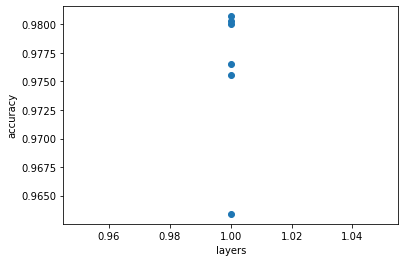

In [4]:
plt.scatter(df["hidden_units"],df["accuracy"])
plt.xlabel("hidden_units")
plt.ylabel("accuracy")
plt.show()

In [36]:
mnist = tf.keras.datasets.mnist
mnist = mnist.load_data()
(x_train,y_train),(x_test,y_test)=mnist
x_train,x_test = tf.keras.utils.normalize(x_train,axis=1),tf.keras.utils.normalize(x_test,axis=1)

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

model = tf.keras.Sequential(
  [      
      tf.keras.layers.Conv2D(kernel_size=3, filters=12, use_bias=False, padding='same'),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Conv2D(kernel_size=6, filters=24, use_bias=False, padding='same', strides=2),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Conv2D(kernel_size=6, filters=32, use_bias=False, padding='same', strides=2),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Flatten(),
      
      tf.keras.layers.Dense(200, use_bias=False),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),
      
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

optim = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

steps_per_epoch = len(x_train)//64

model.fit(x_train,y_train,epochs=10,steps_per_epoch = steps_per_epoch,callbacks=[lr_decay_callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
937/937 [==============================] - 76s 81ms/step - loss: 0.1208 - accuracy: 0.9628 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.006.
Epoch 2/10
937/937 [==============================] - 80s 85ms/step - loss: 0.0520 - accuracy: 0.9842 - lr: 0.0060

Epoch 3: LearningRateScheduler setting learning rate to 0.0036.
Epoch 3/10
937/937 [==============================] - 77s 82ms/step - loss: 0.0322 - accuracy: 0.9899 - lr: 0.0036

Epoch 4: LearningRateScheduler setting learning rate to 0.0021599999999999996.
Epoch 4/10
937/937 [==============================] - 105s 112ms/step - loss: 0.0193 - accuracy: 0.9939 - lr: 0.0022

Epoch 5: LearningRateScheduler setting learning rate to 0.001296.
Epoch 5/10
937/937 [==============================] - 78s 83ms/step - loss: 0.0139 - accuracy: 0.9958 - lr: 0.0013

Epoch 6: LearningRateScheduler setting learning rate to 0.0007775999999999998.
Epoc

In [37]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0178 - accuracy: 0.9943
0.9943000078201294


In [40]:
model.save('num_model')

INFO:tensorflow:Assets written to: num_model/assets


INFO:tensorflow:Assets written to: num_model/assets


In [41]:
new_model = tf.keras.models.load_model('num_model')

In [42]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 2s 6ms/step


7


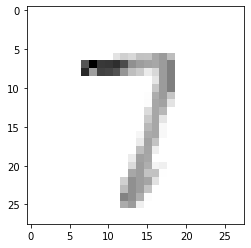

In [45]:
print(np.argmax(predictions[234]))
plt.imshow(x_test[234],cmap=plt.cm.binary)